## Observations and Insights 

In [4]:
# Dependencies and Setup
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
merged_df



# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#check total number of Mouse ID in the origial data
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [21]:
#find duplicate time points
# merged_df[["Mouse ID","Timepoint" ]].nunique()

drop =merged_df["Timepoint"].drop_duplicates().reset_index(drop=True)
#merged_df.drop_duplicates()
drop
# len(merged_df)

0     0
1     5
2    10
3    15
4    20
5    25
6    30
7    35
8    40
9    45
Name: Timepoint, dtype: int64

In [7]:
# Checking the number of mice.
merged_df["Mouse ID"].value_counts()

# check data types
# merged_df.dtypes



g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# merged_df[["Mouse ID", "Timepoint"]]

# 
dupli =merged_df["Mouse ID"].duplicated(keep='first')
dupli[0:24]


0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20    False
21     True
22     True
23     True
Name: Mouse ID, dtype: bool

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_df["Tumor Volume (mm3)"].describe()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Combining results of multiple groupby functions into a new DataFrame.
# Using a single groupby with agg operator once.

# merged_df.groupby(["Tumor Volume (mm3)"]).std()
# merged_df.groupby(["Tumor Volume (mm3)"]).sem()

# merged_df.groupby('Mouse ID')['Drug Regimen'].nunique().plot(kind='bar')

print(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].describe())

SE = merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
print(f"Standard Error: \n  {SE}")
SE.columns['regimen', 'std error']

# stats = pd.DataFrame()







              count       mean       std        min        25%        50%  \
Drug Regimen                                                                
Capomulin     230.0  40.675741  4.994774  23.343598  37.685933  41.557809   
Ceftamin      178.0  52.591172  6.268188  45.000000  47.208427  51.776157   
Infubinol     178.0  52.884795  6.567243  36.321346  47.312353  51.820584   
Ketapril      188.0  55.235638  8.279709  45.000000  48.232987  53.698743   
Naftisol      186.0  54.331565  8.134708  45.000000  47.285874  52.509285   
Placebo       181.0  54.033581  7.821003  45.000000  47.459053  52.288934   
Propriva      161.0  52.322552  6.507770  45.000000  47.081086  50.854632   
Ramicane      228.0  40.216745  4.846308  22.050126  36.674635  40.673236   
Stelasyn      181.0  54.233149  7.710419  45.000000  48.047139  52.431737   
Zoniferol     182.0  53.236507  6.966589  45.000000  47.337876  51.818479   

                    75%        max  
Drug Regimen                        
C

AttributeError: 'Series' object has no attribute 'columns'

In [115]:
# SEM of tumor volume for each type of regimen

merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg("sem")


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [71]:
# total number of mice for each treatment
mice_per_regimen = merged_df["Drug Regimen"].value_counts()
df2  = mice_per_regimen.copy() 
# barplot = merged_df.plot.bar(x='Drug Regimen', y='total number of mice', rot=0)

# plt.bar(x_axis, merged_df["Drug Regimen"], color='r', alpha=0.5, align="center")
# mice_per_regimen.iloc[0:5]

df2 = pd.DataFrame({"Total Mice":df2})

df2.rename({'index' : 'total'}, axis=1)
# rename({'AvgBill' : 'Bill'}, axis=1)

# df2.rename(columns={"index" : "Drug Regi"})

# df2.plot.bar(x='Drug Regi', y='Total mice', rot=0)






,Total Mice
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


<AxesSubplot:xlabel='Drug Regimen'>

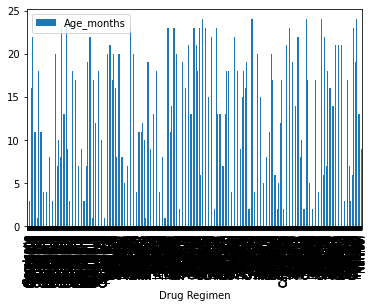

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Bar plot with pandas

# merged_df.plot(kind='bar', x='Drug Regimen',y='Age_months')



In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
